# Part 2. Analyze one simulation

In [1]:
from pathlib import Path

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", dpi=80)

In [3]:
import fluidsim as fls

path_dir_data = Path(fls.FLUIDSIM_PATH) / "tutorial_parametric_study"
path_runs = sorted(path_dir_data.glob("*"), key=lambda p:p.name)
[p.name for p in path_runs]

['ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.01_D0.5_2021-10-05_15-35-47',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.02_D0.5_2021-10-05_16-12-36',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.06_D0.5_2021-10-05_17-25-48',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.08_D0.5_2021-10-05_18-01-23']

Let's first recreate a `sim` object with the last directory:

In [4]:
from fluidsim import load

In [5]:
sim = load(path_runs[-3])

*************************************
Program fluidsim
sim:                <class 'fluidsim_core.extend_simul.extend_simul_class.<locals>.NewSimul'>
sim.output:         <class 'fluidsim.solvers.ns3d.strat.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.state:          <class 'fluidsim.solvers.ns3d.strat.state.StateNS3DStrat'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>
sim.forcing:        <class 'fluidsim.solvers.ns3d.forcing.ForcingNS3D'>

solver ns3d.strat, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =      4 ; ny =      4 ; nz =      4
Lx = 4.5 ; Ly = 4.5 ; Lz = 1.5
path_run =
/home/pierre/Sim_data/tutorial_parametric_study/ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31
init_fields.type: constant

Initialization outputs:
sim.output.phys_fields:      

The object `sim` created from the simulation directory is very similar to the object `sim` used during the simulation. However, since it has been created with the function `fluidsim.load` (and not with `fluidsim.load_for_restart`), it is light (no state loaded and no operators created) and we cannot restart the simulation with this object. But we can easily get a lot of information on the simulation and of course, plot some figures!

## Get the parameters of the simulation

In [6]:
sim.params.oper


<oper Lx="4.5" Ly="4.5" Lz="1.5" NO_SHEAR_MODES="True" coef_dealiasing="0.8"
      nx="144" ny="144" nz="48" truncation_shape="cubic" type_fft="default"
      type_fft2d="sequential"/>  

In [7]:
sim.params.forcing.type

'milestone'

In [8]:
sim.params.forcing.milestone


<milestone nx_max="48">
  <objects diameter="0.5" number="3" type="cylinders"
           width_boundary_layers="0.1"/>  

  <movement type="periodic_uniform">
    <uniform speed="1.0"/>  

    <sinusoidal length="1.0" period="1.0"/>  

    <periodic_uniform length="3.5" length_acc="0.25" speed="0.04"/>  

  </movement>

</milestone>

## Which data were saved?

In [9]:
sim.output.path_run

'/home/pierre/Sim_data/tutorial_parametric_study/ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31'

In [10]:
!ls {sim.output.path_run}

info_solver.xml           state_phys_t00040.140.nc  state_phys_t00260.103.nc
params_simul.xml          state_phys_t00060.192.nc  state_phys_t00280.063.nc
spatial_means.txt         state_phys_t00080.095.nc  state_phys_t00300.130.nc
spatial_means_regions     state_phys_t00100.153.nc  state_phys_t00320.129.nc
spatiotemporal            state_phys_t00120.176.nc  state_phys_t00340.151.nc
spectra1d.h5              state_phys_t00140.150.nc  state_phys_t00360.094.nc
spectra3d.h5              state_phys_t00160.073.nc  state_phys_t00380.129.nc
spectra_kzkh.h5           state_phys_t00180.065.nc  state_phys_t00400.025.nc
spect_energy_budg.h5      state_phys_t00200.093.nc  stdout.txt
state_phys_t00000.000.nc  state_phys_t00220.007.nc
state_phys_t00020.268.nc  state_phys_t00240.006.nc


In [11]:
!ls {sim.output.path_run + "/spatiotemporal"}

rank00000_tmin00000.000.h5  rank00001_tmin00000.000.h5


## Representation of the information printed in the log

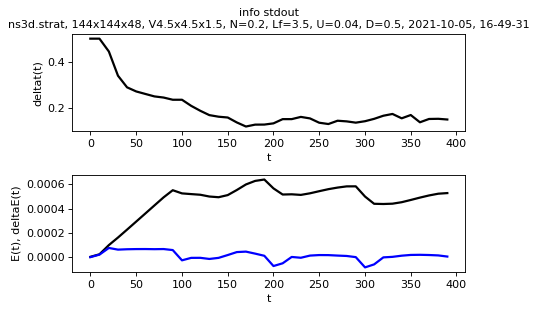

In [12]:
sim.output.print_stdout.plot()

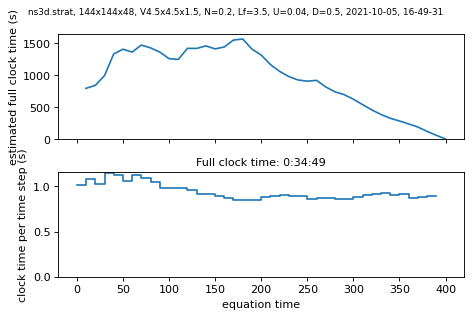

In [13]:
sim.output.print_stdout.plot_clock_times()

## Spatial means saved in spatial_means.txt

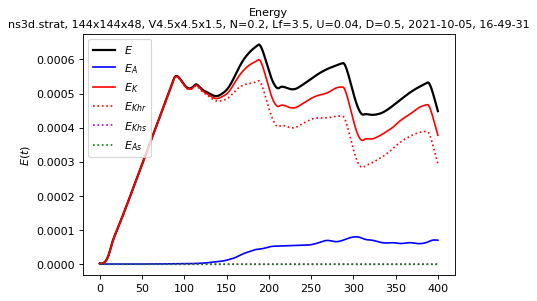

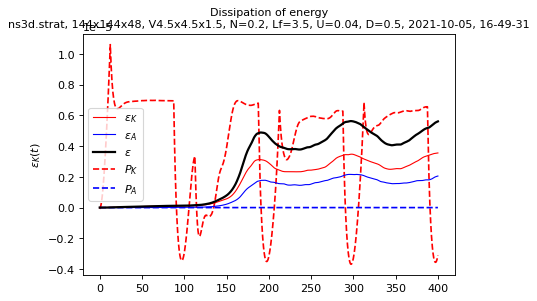

In [14]:
sim.output.spatial_means.plot()

In [15]:
info_forcing = sim.forcing.get_info()
info_forcing

{'period': 200.0}

In [16]:
period = info_forcing["period"]

In [17]:
sim.output.spatial_means.get_dimless_numbers_averaged?

Signature: sim.output.spatial_means.get_dimless_numbers_averaged(tmin=0, tmax=None)
Docstring: <no docstring>
File:      ~/Dev/fluidsim/fluidsim/solvers/ns3d/strat/output/spatial_means.py
Type:      method


In [18]:
dimless_numbers = sim.output.spatial_means.get_dimless_numbers_averaged(tmin=period)
dimless_numbers

{'Fh': 0.03442003363915731,
 'R2': 70.8592505,
 'R4': 30.29826938649225,
 'epsK2/epsK': 0.042376597274872044,
 'Gamma': 0.6186840670881376,
 'dimensional': {'Uh2': 0.0004185852799, 'epsK': 2.83437002e-06}}

## Spectra saved in spectra1d.h5

In [19]:
sim.output.spectra.plot1d?

Signature:
sim.output.spectra.plot1d(
    tmin=0,
    tmax=None,
    coef_compensate=0,
    coef_plot_k3=None,
    coef_plot_k53=None,
    coef_plot_k2=None,
    xlim=None,
    ylim=None,
    directions=('x', 'z'),
)
Docstring: <no docstring>
File:      ~/Dev/fluidsim/fluidsim/solvers/ns3d/output/spectra.py
Type:      method


plot1d(tmin=     200, tmax= 400.025, coef_compensate=1.667)
plot 1D spectra
tmin =  200.093 ; tmax =  400.025
imin =      100 ; imax =      200


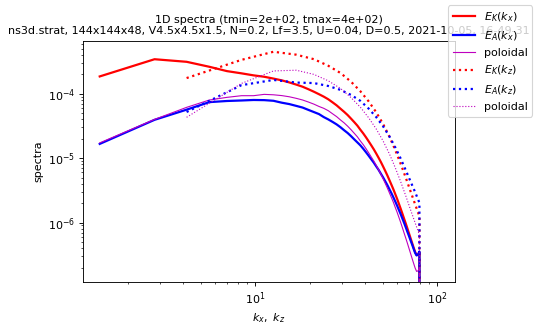

In [20]:
sim.output.spectra.plot1d(tmin=period, coef_compensate=5 / 3)

## Simple cross-sections of the flow fields



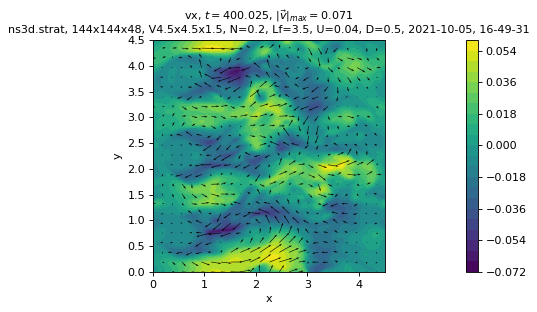

In [21]:
sim.output.phys_fields.plot()

In [22]:
sim.output.phys_fields.plot?

Signature:
sim.output.phys_fields.plot(
    field=None,
    time=None,
    QUIVER=True,
    vector='v',
    equation=None,
    nb_contours=20,
    type_plot='contourf',
    vmin=None,
    vmax=None,
    cmap=None,
    numfig=None,
    SCALED=True,
)
Docstring:
Plot a field.

Parameters
----------

field : {str, np.ndarray}, optional

time : number, optional

QUIVER : True

vecx : 'ux'

vecy : 'uy'

nb_contours : 20

type_plot : 'contourf'

vmin : None

vmax : None

cmap : None (usually 'viridis')

numfig : None
File:      ~/Dev/fluidsim/fluidsim/base/output/phys_fields3d.py
Type:      method


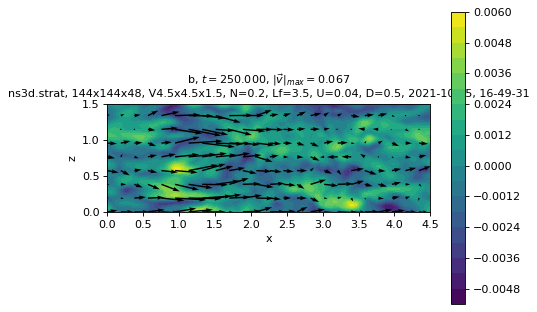

In [23]:
sim.output.phys_fields.plot(
    field="b", time=1.25 * period, equation=f"y={sim.params.oper.Lx/2}"
)

In [24]:
sim.output.phys_fields.animate?

Signature:
sim.output.phys_fields.animate(
    key_field=None,
    dt_frame_in_sec=0.3,
    dt_equations=None,
    tmin=None,
    tmax=None,
    repeat=True,
    save_file=False,
    numfig=None,
    fargs={},
    fig_kw={},
    **kwargs,
)
Docstring:
Load the key field from multiple save files and display as
an animated plot or save as a movie file.

Parameters
----------
key_field : str
    Specifies which field to animate
dt_frame_in_sec : float
    Interval between animated frames in seconds
dt_equations : float
    Approx. interval between saved files to load in simulation time
    units
tmax : float
    Animate till time `tmax`.
repeat : bool
    Loop the animation
save_file : str or bool
    Path to save the movie. When `True`  saves into a file instead
    of plotting it on screen (default: ~/fluidsim_movie.mp4). Specify
    a string to save to another file location. Format is autodetected
    from the filename extension.
numfig : int
    Figure number on the window
fargs : dic

## How to use Paraview or Visit?

For serious 3D representations, it is easy to use specialized software like Paraview or Visit. These programs are able to open .xmf files which describe how the physical fields are stored in the hdf5 / netcdf fluidsim files.

One needs to create the .xmf file with the command line tool `fluidsim-create-xml-description`.

In [25]:
! fluidsim-create-xml-description {sim.output.path_run}

Creation of the file /home/pierre/Sim_data/tutorial_parametric_study/ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31/states_phys.xmf
Open it with a Xdmf reader to read the output files.


In [26]:
! ls {sim.output.path_run + "/*.xmf"}

/home/pierre/Sim_data/tutorial_parametric_study/ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31/states_phys.xmf


In [27]:
!head -20 {sim.output.path_run + "/states_phys.xmf"}

<?xml version="1.0" ?>
<!DOCTYPE Xdmf SYSTEM "Xdmf.dtd" []>
<Xdmf>
  <Domain>
    <Grid Name="TimeSeries" GridType="Collection"
          CollectionType="Temporal">
    
    <Grid Name="my_uniform_grid" GridType="Uniform">
      <Time Value="0.000000000" />
      <Topology TopologyType="3DCoRectMesh" Dimensions="48 144 144">
      </Topology>
      <Geometry GeometryType="Origin_DxDyDz">
        <DataItem Dimensions="3" NumberType="Float" Format="XML">
        0 0 0
        </DataItem>
        <DataItem Dimensions="3" NumberType="Float" Format="XML">
        0.03125 0.03125 0.03125
        </DataItem>
      </Geometry>



## Spatiotemporal spectra

In [28]:
sim.output.spatiotemporal_spectra.plot_temporal_spectra?

Signature:
sim.output.spatiotemporal_spectra.plot_temporal_spectra(
    key_field=None,
    tmin=0,
    tmax=None,
    dtype=None,
    xscale='log',
)
Docstring: plot the temporal spectra computed from the 4d spectra
File:      ~/Dev/fluidsim/fluidsim/base/output/spatiotemporal_spectra.py
Type:      method


load times series...


Output()

tmin= 204.215, tmax= 392.828, nit=25


Output()

performing time fft...
load times series...


Output()

tmin= 204.215, tmax= 392.828, nit=25


Output()

computing temporal spectra...


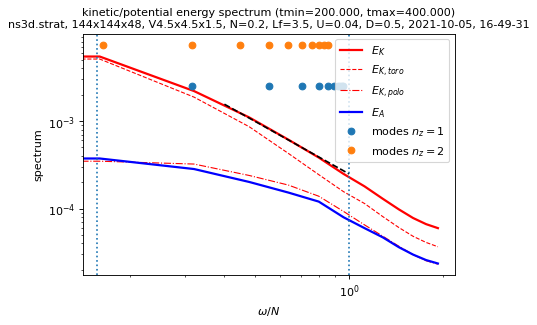

In [29]:
sim.output.spatiotemporal_spectra.plot_temporal_spectra(tmin=period)

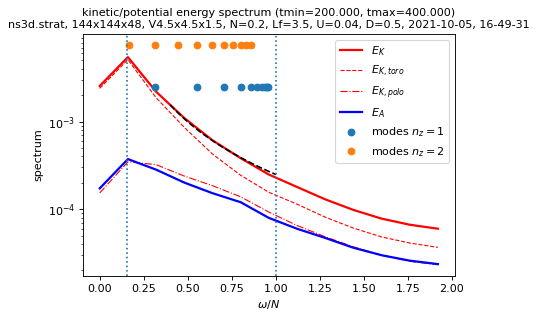

In [30]:
sim.output.spatiotemporal_spectra.plot_temporal_spectra(tmin=period, xscale="linear")

In [31]:
sim.output.spatiotemporal_spectra.plot_kzkhomega?

Signature:
sim.output.spatiotemporal_spectra.plot_kzkhomega(
    key_field=None,
    tmin=0,
    tmax=None,
    dtype=None,
    equation=None,
    xmax=None,
    ymax=None,
    cmap=None,
    vmin=None,
    vmax=None,
)
Docstring:
plot the spatiotemporal spectra, with a cylindrical average in k-space

equation must start with 'omega=', 'kh=', 'kz=', 'ikh=' or 'ikz='.
File:      ~/Dev/fluidsim/fluidsim/base/output/spatiotemporal_spectra.py
Type:      method


Computing spectra...
load times series...


Output()

tmin= 204.215, tmax= 392.828, nit=25


Output()

performing time fft...


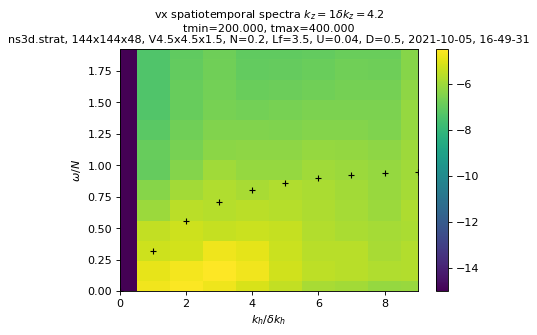

In [32]:
sim.output.spatiotemporal_spectra.plot_kzkhomega(tmin=period, equation="ikz=1")

Computing spectra...
load times series...


Output()

tmin= 204.215, tmax= 392.828, nit=25


Output()

performing time fft...
Computing ur, ud spectra...
load times series...


Output()

tmin= 204.215, tmax= 392.828, nit=25


Output()

computing temporal spectra...


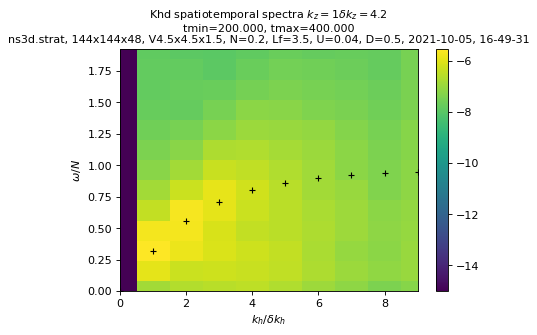

In [33]:
sim.output.spatiotemporal_spectra.plot_kzkhomega(
    key_field="Khd", tmin=period, equation="ikz=1"
)